# Health Monitoring

## Import Libraries 

In [1]:
import wget
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
config =tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
import PIL
from PIL import Image
from glob import glob
from keras.models import Sequential
from keras.layers import Input,Lambda,Dense,Flatten
from keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from keras import regularizers
from tensorflow.keras.optimizers import RMSprop
#from tensorflow import keras
#from keras.preprocessing import image
sys.modules['Image'] = Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


#!wget --no-check-certificate \https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \-O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input


local_weights_file = r"C:\Users\CHINMAY\Desktop\weights\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

IMAGE_SIZE=150
pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),include_top=False,weights=None)


pre_trained_model.load_weights(local_weights_file)


#model.summary()




tf.__version__

Using TensorFlow backend.


last layer output shape:  (None, 7, 7, 768)


'2.0.0'

## Applying the InceptionV3 model with Neural Network

In [2]:
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
    
    
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = Sequential()
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(
    optimizer=RMSprop(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


last layer output shape:  (None, 7, 7, 768)


## Import the dataset

In [3]:
TRAIN=r"C:\Users\CHINMAY\Desktop\train2"  # 70% of the dataset
VAL=r"C:\Users\CHINMAY\Desktop\validate2" # 20% of the dataset
TEST=r"C:\Users\CHINMAY\Desktop\Test2"    # 10% of the dataset

## Image data Augmentation 

In [3]:
#IMG_SIZE=299


train_datagen=ImageDataGenerator(rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
   


train_generator = train_datagen.flow_from_directory(
                        TRAIN,
                         target_size=(IMAGE_SIZE,IMAGE_SIZE),
                         batch_size=128,
                         class_mode='categorical')


val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                   VAL,
                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                   batch_size=128,
                   class_mode='categorical')


Test_datagen=ImageDataGenerator(rescale=1./255)
Test_generator = Test_datagen.flow_from_directory(
                   TEST,
                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                   batch_size=128,
                   class_mode='categorical')


      



Found 15444 images belonging to 3 classes.
Found 4339 images belonging to 3 classes.
Found 2209 images belonging to 3 classes.


## Training 

In [4]:
history= model.fit_generator(train_generator,epochs=6,validation_data=val_generator)

Epoch 1/6
121/121 [==============================] - 1644s 14s/step - loss: 0.2439 - accuracy: 0.9115 - val_loss: 0.2455 - val_accuracy: 0.9318
Epoch 2/6
121/121 [==============================] - 1640s 14s/step - loss: 0.1189 - accuracy: 0.9548 - val_loss: 0.6245 - val_accuracy: 0.8785
Epoch 3/6
121/121 [==============================] - 1640s 14s/step - loss: 0.0960 - accuracy: 0.9635 - val_loss: 0.9382 - val_accuracy: 0.8564
Epoch 4/6
121/121 [==============================] - 1632s 13s/step - loss: 0.0851 - accuracy: 0.9684 - val_loss: 0.5418 - val_accuracy: 0.9071
Epoch 5/6
121/121 [==============================] - 1617s 13s/step - loss: 0.0810 - accuracy: 0.9702 - val_loss: 0.6115 - val_accuracy: 0.9034
Epoch 6/6
121/121 [==============================] - 1627s 13s/step - loss: 0.0745 - accuracy: 0.9731 - val_loss: 0.7799 - val_accuracy: 0.8873


## Image display 

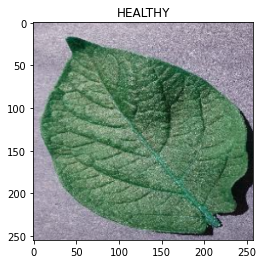

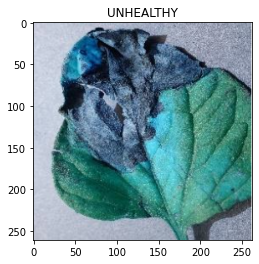

In [6]:
healthy = cv2.imread(r"C:\Users\CHINMAY\Desktop\Healthy.png")
unhealthy = cv2.imread(r"C:\Users\CHINMAY\Desktop\Unhealthy.png")

plt.title("HEALTHY")
plt.imshow(healthy)
plt.show()


plt.title("UNHEALTHY")
plt.imshow(unhealthy)
plt.show()


## Prediction 

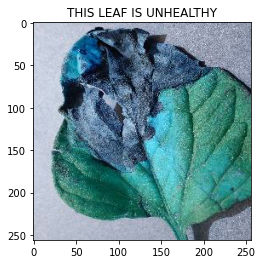

In [6]:
model.save=("monitoring.h5")


from keras.preprocessing import image
pic=r"C:\Users\CHINMAY\Desktop\unhealthy.jpg"
image1=image.load_img(pic)                    
image1=image1.resize((150,150))
image1=image.img_to_array(image1)
image1=np.expand_dims(image1,axis=0)
result=model.predict(image1)

if result[0][1] == 1:
    #prediction = 'healthy'
    #print(prediction)
    genuine = cv2.imread(pic)
    plt.title("THIS LEAF IS HEALTHY")
    plt.imshow(genuine)
    plt.show()
else:
    #prediction = 'unhealthy'
    #print(prediction)
    forged = cv2.imread(pic)
    plt.title("THIS LEAF IS UNHEALTHY")
    plt.imshow(forged)
    plt.show()
    



## Evaluation

In [10]:
print("Overall Training Loss and Accuracy")
model.evaluate(train_generator)

Overall Training Loss and Accuracy
121/121 [==============================] - 266s 2s/step - loss: 1.1870 - accuracy: 0.8568


[1.18698046227132, 0.85677284]

In [8]:
print("Overall Validation Loss and Accuracy")
model.evaluate(val_generator)

Overall Validation Loss and Accuracy
34/34 [==============================] - 57s 2s/step - loss: 0.8196 - accuracy: 0.8873


[0.8195758251582875, 0.8873012]

In [9]:
print("Overall Test Loss and Accuracy")
model.evaluate(Test_generator)

Overall Test Loss and Accuracy
18/18 [==============================] - 32s 2s/step - loss: 0.9803 - accuracy: 0.8814


[0.9803182714515262, 0.88139427]